In [44]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [5, 3]

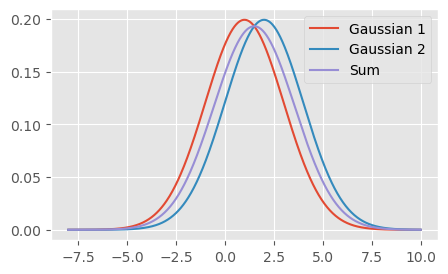

In [45]:
from scipy.stats import norm

# parameters for the two Gaussian distributions
mean1, sd1 = 1, 2
mean2, sd2 = 2, 2

x = np.linspace(-8, 10, 1000)

# calculate the PDF for each Gaussian distribution
pdf1 = norm.pdf(x, mean1, sd1)
pdf2 = norm.pdf(x, mean2, sd2)

# calculate the PDF for the sum of the two Gaussian distributions


# plot the PDFs
plt.plot(x, pdf1, label="Gaussian 1")
plt.plot(x, pdf2, label="Gaussian 2")
plt.plot(x, (pdf1 + pdf2) / 2, label="Sum")
plt.legend()
plt.show()

In [46]:
verosimilitud, marginal, prior = (
    norm.pdf(x=1, loc=1, scale=2),
    (norm.pdf(x=1, loc=1, scale=2) + norm.pdf(x=1, loc=2, scale=2)) / 2,
    0.5,
)

posterior = (verosimilitud * prior) / marginal
posterior

0.5312093733737563

<Axes: >

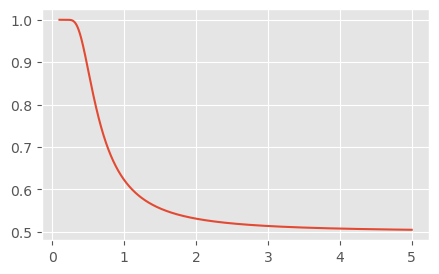

In [47]:
def posterior(sigma):
    verosimilitud, marginal, prior = (
        norm.pdf(x=1, loc=1, scale=sigma),
        (norm.pdf(x=1, loc=1, scale=sigma) + norm.pdf(x=1, loc=2, scale=sigma)) / 2,
        0.5,
    )

    return (verosimilitud * prior) / marginal


x = np.linspace(0.1, 5, 1000)
sns.lineplot(x=x, y=[posterior(sigma) for sigma in x])

# cuando aumenta el SD, es mas dificil distinguir la distribucion y la posterior se parece mas al prior de 0.5.
# cuando el SD es muy chico, las distribuciones estan muy localizadas sobre la media y una observacion da mucha certidumbre
# sobre cual de las dos distribuciones es la correcta, lo cual significa un gran cambio en la posterior.

### ej6

<Axes: >

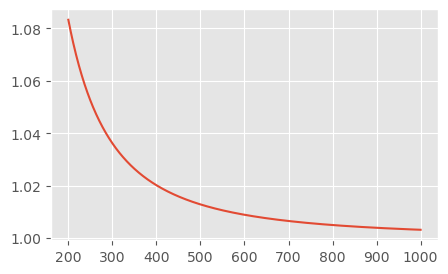

In [48]:
def O12(sd):
    return np.exp(3200 / (sd**2))


x = np.linspace(200, 1000, 1000)
sns.lineplot(x=x, y=[O12(sd) for sd in x])
## OBS =  si SD tiende a infinito, entonces la obs no es informativa y el ratio O12 tiende a 1
## Si el SD tiende a 0, entonces la obs es muy informativa y el ratio tiende 1 o a 0, dependiendo del valor de la observacion
## respecto a las medias consideradas.

### EJ3 guia 6

In [49]:
def posterior_binom(alpha, beta, y_obs, n_obs, samples_from_posterior=2000):
    posterior = st.beta(alpha + y_obs, beta + n_obs - y_obs)
    samples = posterior.rvs(samples_from_posterior)

    return samples

Un estudio reporta que de 100 pacientes tratados con un nuevo medicamento, 70 mostraron
mejoría. Calcular la distribución posterior de la probabilidad de mejoría 𝜃 después de este
estudio. Utilizar diferentes priors y comparar las distribuciones posteriores resultantes después de observar el mismo estudio. Graficar las distribuciones posteriores para visualizar
la influencia del prior en la inferencia bayesiana sobre 𝜃. ¿Qué sucede cuando se varía la
esperanza del prior? ¿Qué sucede cuando se varía 𝛼 + 𝛽 manteniendo constante la esperanza
del prior?

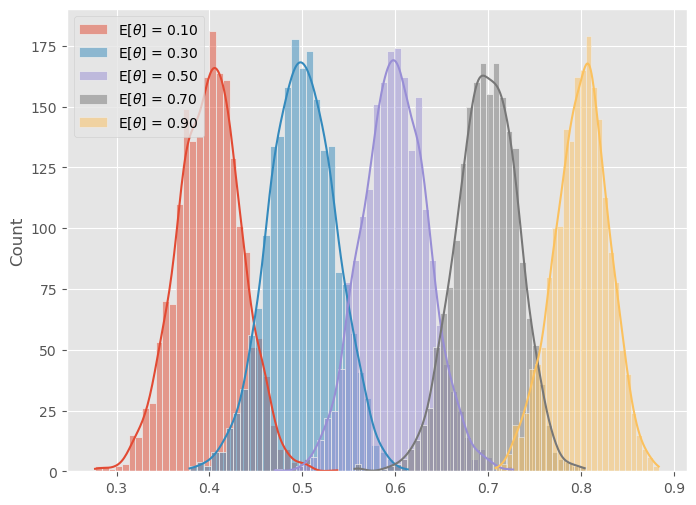

In [50]:
plt.figure(figsize=(8, 6))
for alpha, beta in [(10, 90), (30, 70), (50, 50), (70, 30), (90, 10)]:
    samples_posterior = posterior_binom(y_obs=70, n_obs=100, alpha=alpha, beta=beta)
    sns.histplot(
        samples_posterior, kde=True, label=f"E[$\\theta$] = {(alpha/(alpha+beta)):.2f}"
    )

plt.legend()

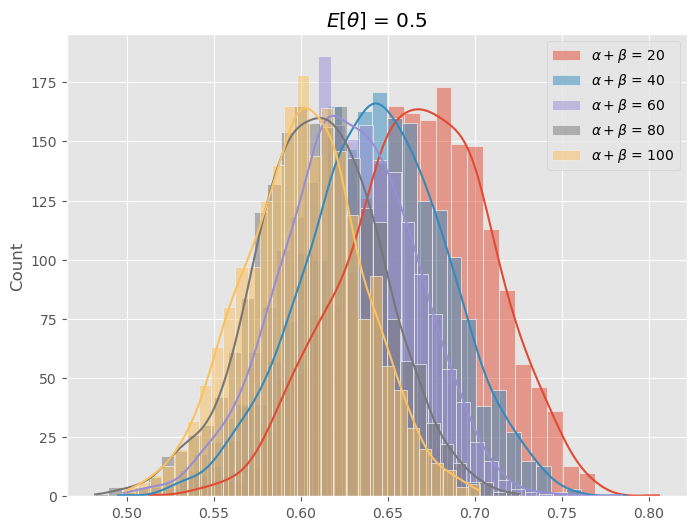

In [52]:
plt.figure(figsize=(8, 6))
for alpha, beta in [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)]:
    samples_posterior = posterior_binom(y_obs=70, n_obs=100, alpha=alpha, beta=beta)
    sns.histplot(
        samples_posterior, kde=True, label=f"$\\alpha+\\beta$ = {(alpha+beta)}"
    )
plt.title("$E[\\theta]$ = 0.5")
plt.legend()

##OBS. Cuanta mas alto alpha+beta, mas evidencia previa y menos influencia de la observacion en la distribucion posterior.

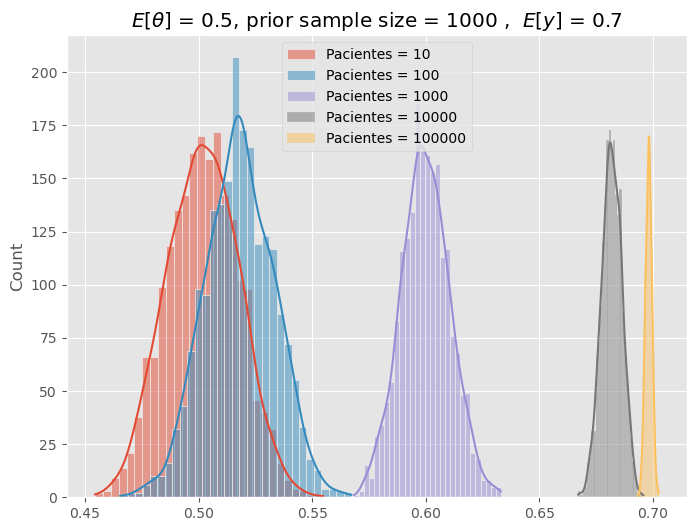

In [60]:
plt.figure(figsize=(8, 6))
for mejorados, totales in [
    (7, 10),
    (70, 100),
    (700, 1000),
    (7000, 10000),
    (70000, 100000),
]:
    samples_posterior = posterior_binom(
        y_obs=mejorados, n_obs=totales, alpha=500, beta=500
    )
    sns.histplot(samples_posterior, kde=True, label=f"Pacientes = {totales}")
plt.title("$E[\\theta]$ = 0.5, prior sample size = 1000 ,  $E[y]$ = 0.7")
plt.legend()

# Al aumentar el tamaño de la muestra se disminuye el efecto del prior sobre la distribucion posterior.

### EJ4



In [63]:
alpha, beta = 9, 6


def mean_and_var(alpha, beta):
    return alpha / (alpha + beta), (alpha * beta) / (
        (alpha + beta) ** 2 * (alpha + beta + 1)
    )


print(mean_and_var(alpha, beta))

(0.6, 0.015)


(0.6, 0.1224744871391589)

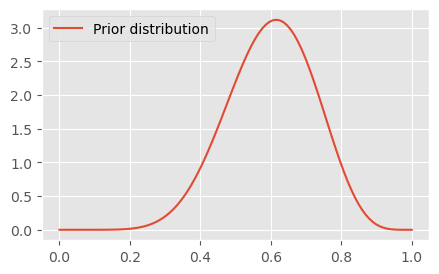

In [86]:
sns.lineplot(
    x=np.linspace(0, 1, 100),
    y=st.beta(9, 6).pdf(np.linspace(0, 1, 100)),
    label="Prior distribution",
)

st.beta(9, 6).mean(), st.beta(9, 6).std()

(0.6492610837438424, 0.014971137878254227)

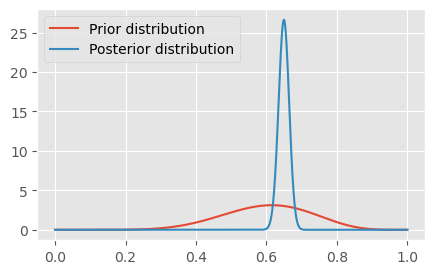

In [87]:
sns.lineplot(
    x=np.linspace(0, 1, 1000),
    y=st.beta(9, 6).pdf(np.linspace(0, 1, 1000)),
    label="Prior distribution",
)
sns.lineplot(
    x=np.linspace(0, 1, 1000),
    y=st.beta(9 + 650, 6 + 1000 - 650).pdf(np.linspace(0, 1, 1000)),
    label="Posterior distribution",
)

st.beta(9 + 650, 6 + 1000 - 650).mean(), st.beta(9 + 650, 6 + 1000 - 650).std()

In [ ]:
# c
n = 1000
k = 600
for alpha, beta in [(1, 1), (5, 5), (10, 5), (5, 10), (100, 50), (50, 100)]:
    posterior = st.beta(st.beta(alpha + k, beta + n - k))
    sns.histplot(samples_posterior, kde=True, label=f"Pacientes = {n}")